* Author: Yi-Shin Lin and others
* Date: 14/08/2023
* License: GPL3
* Title: Fitting the data subset of the AGE scenario

In [1]:
import Model
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from IPython.display import Image
import Model_utility 
import os

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

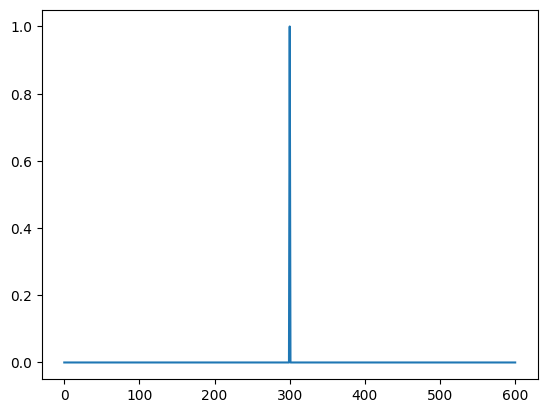

In [2]:
bias = "centre"
drift0 = 1.05
bound0 = 3.0
noise0 = 2.5
x0 = 0.0
dx = 0.01
dt = 0.01
max_time = 14.0
ndt = 0.30   # 300 ms non-decision time
method = "implicit"

# The probability of the system at the time step 0.
res = Model.test_get_starting_pdf(bias, drift0, bound0, noise0, x0, dx, dt, max_time)
print(res.T)
plt.plot(res)

In [3]:
drift0 = 1.05
noise0 = 2.5
bound0 = 3.0
dx = 0.01
dt = 0.01
max_time = 10.0

ndt = 0.30
dt = 0.01
x0 = -1.0
method = "implicit"
bias = "point"

result = Model.test_solve_numerical(method, bias, drift0, bound0, noise0, x0, dx, dt, max_time)

In [ ]:
Model_utility.plot_density(result, dt, ndt)

In [ ]:
df = pd.read_csv('data/age1.csv')
RT = df['RT'].to_numpy()
R = df['TrueR'].to_numpy()
df.head()

In [6]:
def objective_function(x):
    v0 = x[0]
    b0 = x[1]
    ndt = x[2]
    
    # These three paraemters are just assumptions. You should treat them as the tuning parameters and 
    # search for the best ones, using the method, e.g., those found in a machine-learning textbook. 
    x0 = 0.0
    s0 = 1.5
    dx = 0.01
    dt = 0.01
    max_time = 14.0
    bias = "centre"
    method = "implicit"

    estimated_pdf = Model.test_solve_numerical(method, bias, v0, b0, s0, x0, dx, dt, max_time)
    res = Model_utility.calculate_LL(RT, R, estimated_pdf, dt, ndt)
    
    # Write the value of res to a file
    with open('data/likelihood_output.txt', 'a') as f:
        f.write(str(res) + '\n')

    return res
  

def callback(xk):
    # Print out the parameter estimates at every step
    with open('data/estimate_output.txt', 'a') as f:
        f.write(str(xk) + '\n')
    print(xk)


In [7]:
os.getcwd()

'/media/yslin/kakapu/02_Projects/Multi-choices_Github/tests/Model_Age_old'

In [8]:
x0 = [0.5, 0.5, 0.5]  # Initial guess for the parameters
res1 = minimize(objective_function, x0, method='Nelder-Mead', options={'maxiter': 30}, callback=callback)

[0.5   0.525 0.5  ]
[0.475      0.54166667 0.54166667]
[0.45       0.58333333 0.50833333]
[0.475      0.61666667 0.51666667]
[0.4        0.69166667 0.56666667]
[0.375      0.80833333 0.50833333]
[0.35  0.95  0.575]
[0.175      1.21666667 0.61666667]
[0.1        1.59166667 0.56666667]
[-0.125       2.14166667  0.74166667]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.5554784   3.18212449  0.80118313]
[-0.47776492  2.99408865  0.78569102]
[-0.47776492  2.99408865  0.78569102]
[-0.50085591  3.19446207  0.80275396]
[-0.45896252  3.07056264  0.77761806]
[-0.41534835  2.98226227  0.79761856]
[-0.43901294  3.17076933  0.79963604]
[-0.43901294  3.17076933  0.79963604]
[-0.4057515   3.14640307  0.83920757]
[-0.4057515   3.14640307  0.83920757]
[-0.4057515   3.14640307  0.83920757]
[-0.4057515   3.14640307  0.83920757]
[-0.4057515   3.14640307  0.83920757]


The subset of data in the AGE scenario that used young and old pedestrians. 

In [9]:
df = pd.read_csv('data/age2.csv')
RT = df['RT'].to_numpy()
R = df['TrueR'].to_numpy()
# df.head()

proportions = df['TrueR'].value_counts(normalize=True)
proportions[0]

0.38515901060070673

In [10]:
x0 = [0.5, 0.5, 0.5]  # Initial guess for the parameters
res2 = minimize(objective_function, x0, method='Nelder-Mead', options={'maxiter': 30}, callback=callback)

[0.5   0.525 0.5  ]
[0.475      0.54166667 0.54166667]
[0.475      0.54166667 0.54166667]
[0.49166667 0.58888889 0.52222222]
[0.43333333 0.63611111 0.57777778]
[0.43333333 0.63611111 0.57777778]
[0.44166667 0.76388889 0.59722222]
[0.35833333 0.84444444 0.71111111]
[0.3   1.    0.725]
[0.23333333 1.33611111 0.87777778]
[0.00833333 1.65277778 1.11944444]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.15275174  2.29272638  1.26918259]
[-0.17820708  2.39461268  1.27908882]
[-0.17820708  2.39461268  1.27908882]
[-0.16003778  2.38675215  1.26444994]
[-0.16003778  2.38675215  1.26444994]
[-0.16003778  2.38675215  1.26444994]
[-0.18086441  2.47836012  1.26633506]
[-0.17206058  2.48998885  1.26339904]


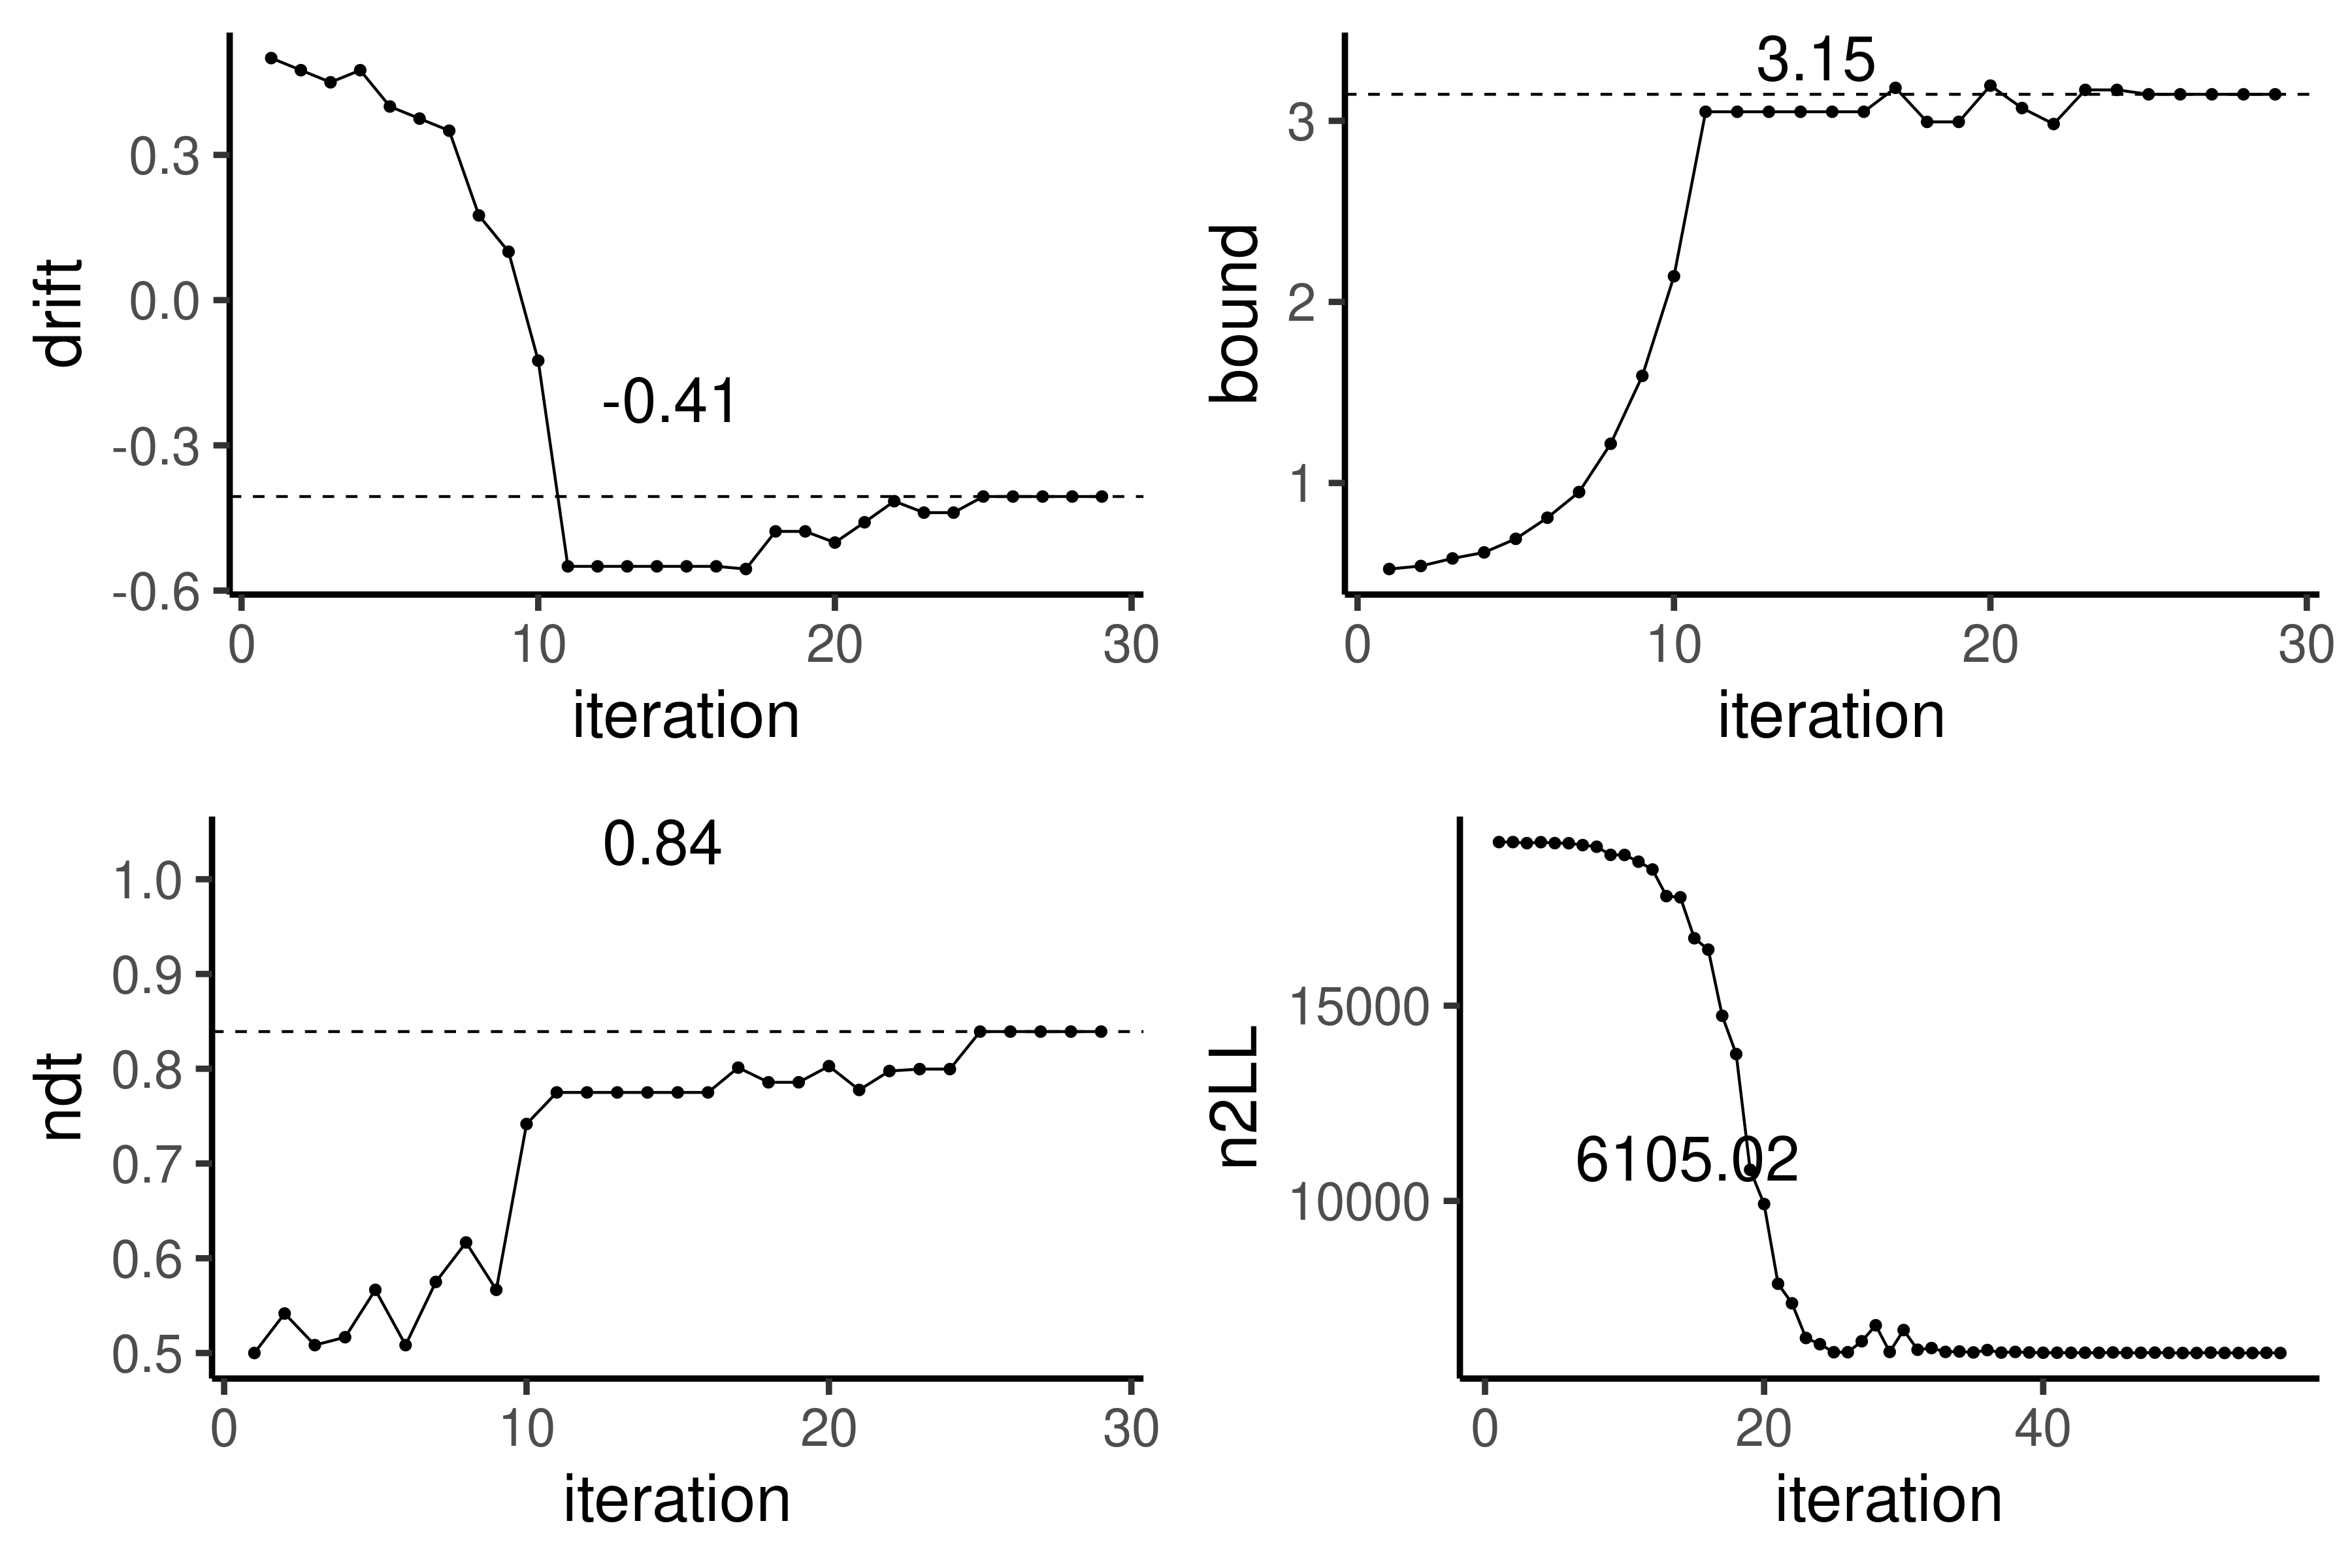

In [9]:
Image(filename='./images/age1.png', width=700)

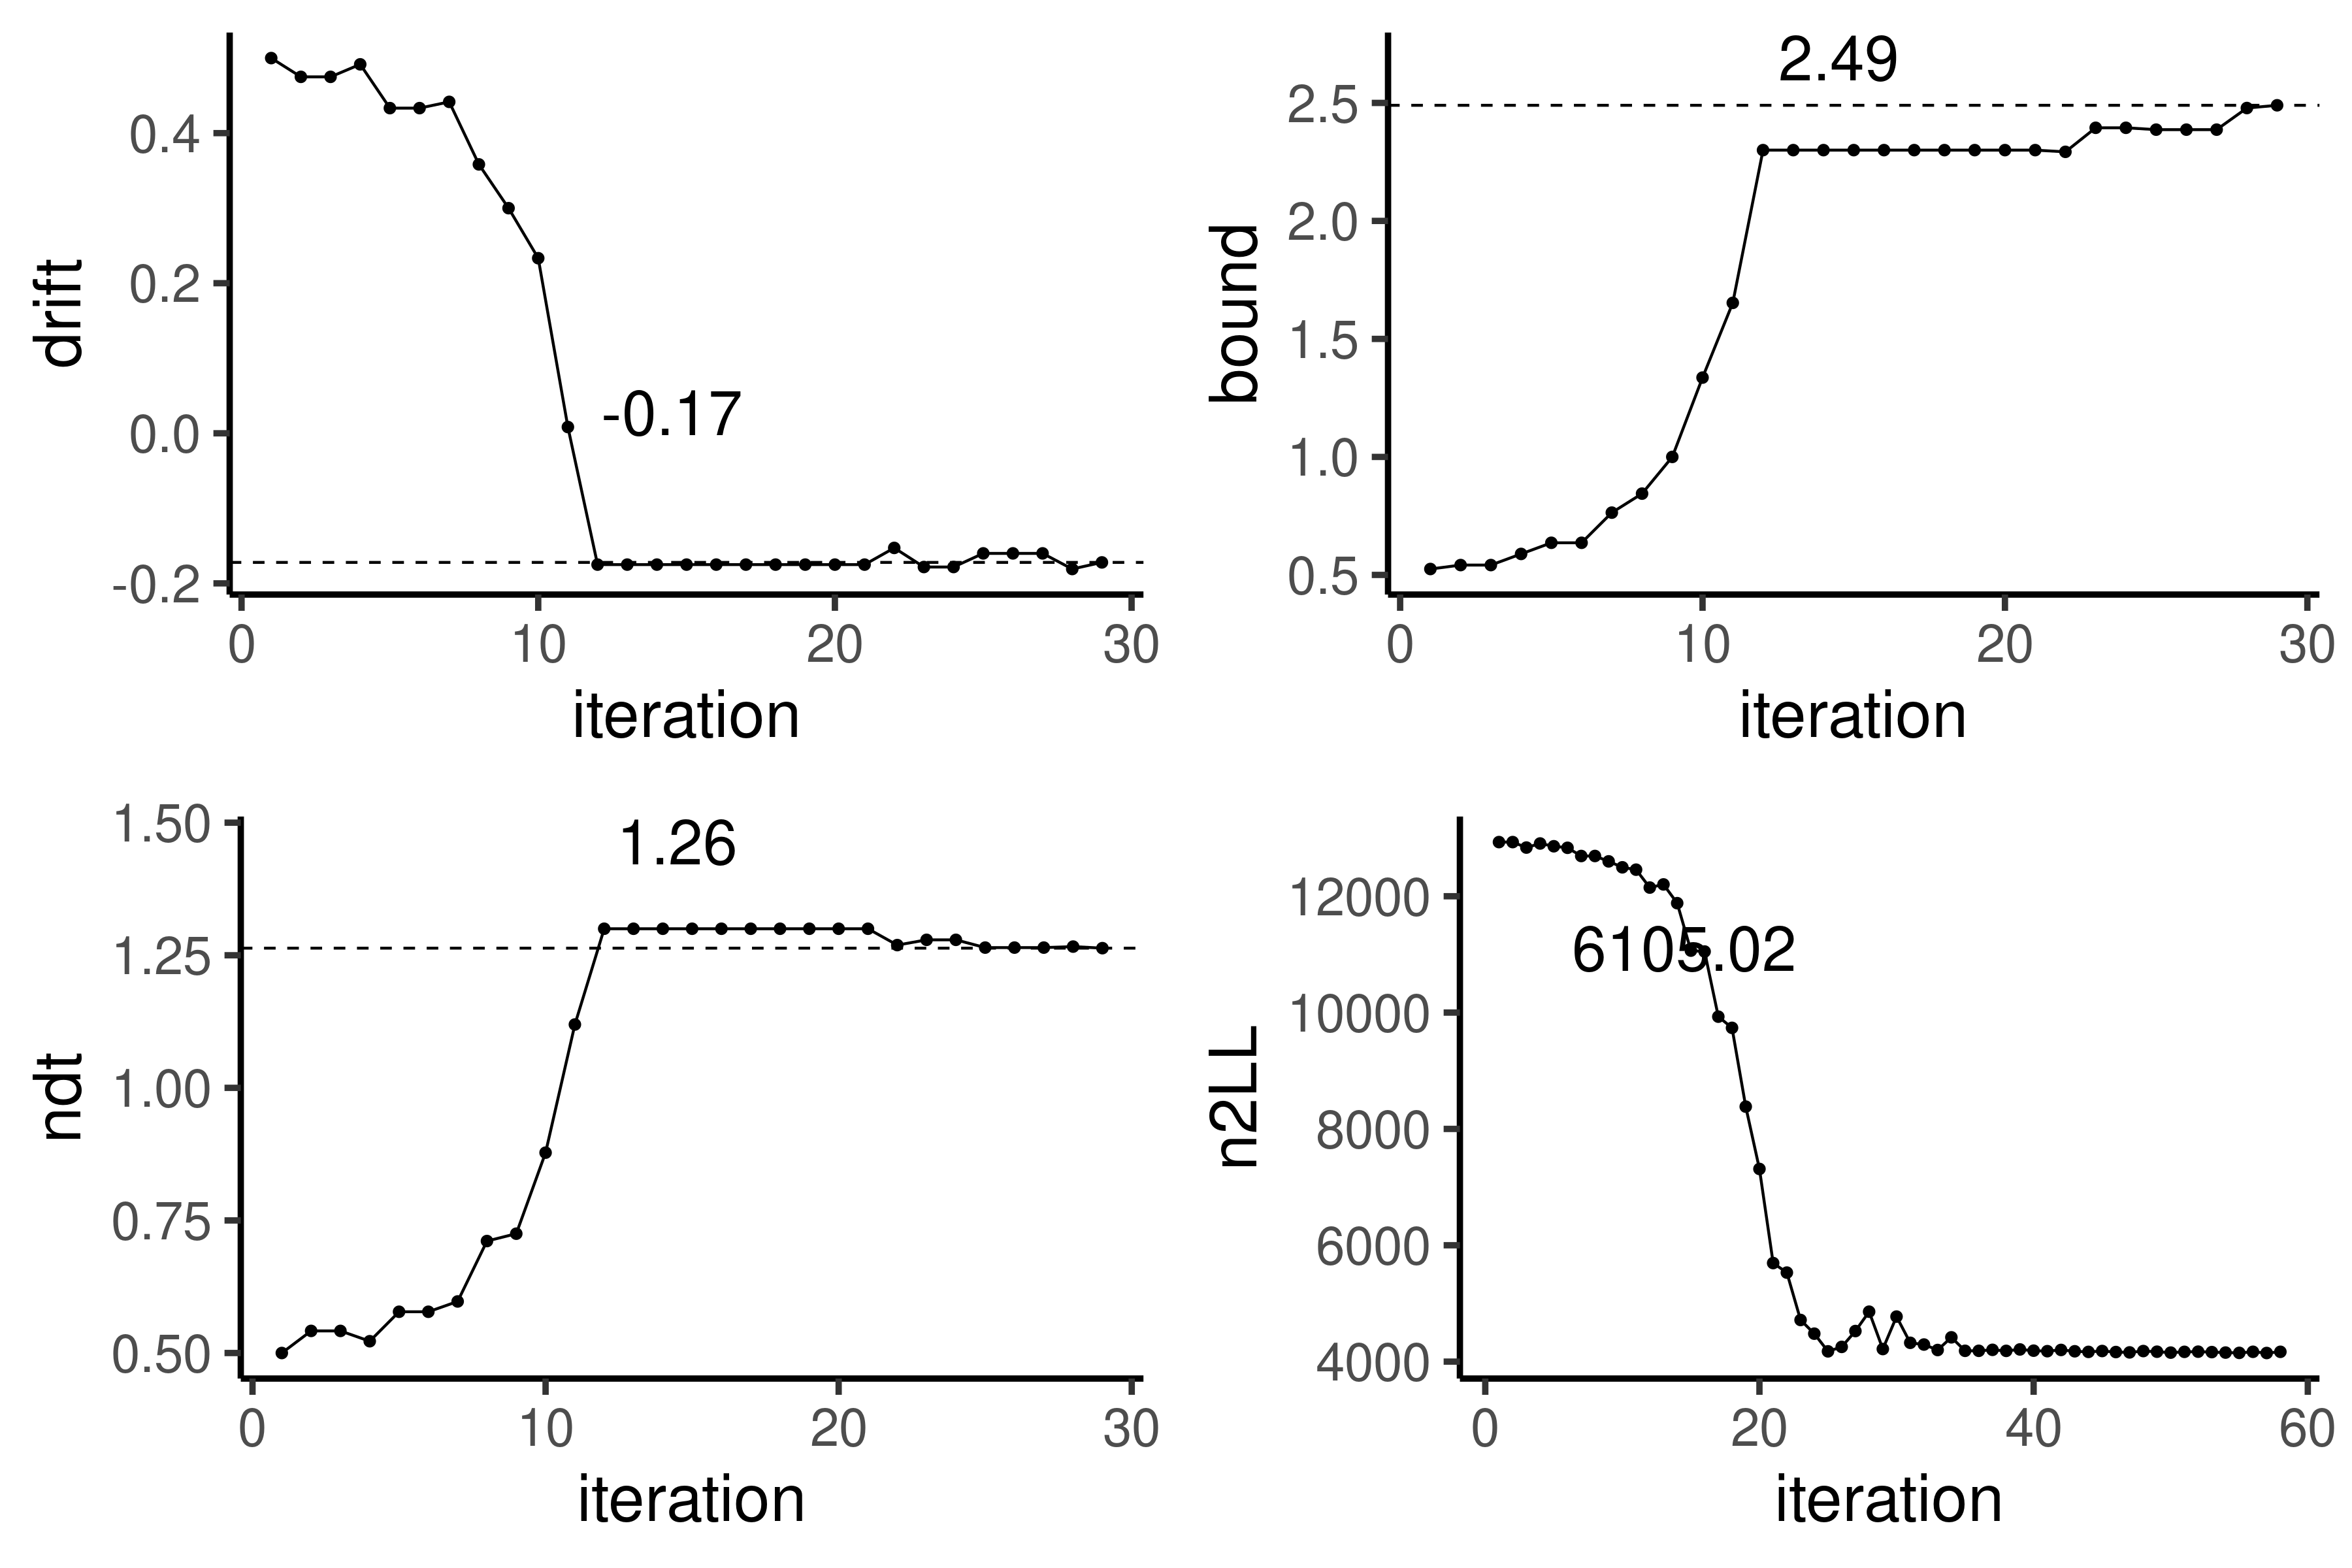

In [10]:
Image(filename='./images/age2.png', width=700) 

In [11]:
v0 = res1.x[0]  # -0.41
b0 = res1.x[1]  # 3.15

x0 = 0.0
s0 = 1.5
dx = 0.01
dt = 0.01
max_time = 14.0
bias = "centre"
method = "implicit"
model_age1 = Model.test_solve_numerical(method, bias, v0, b0, s0, x0, dx, dt, max_time)

v0 = res2.x[0]  # -0.4117
b0 = res2.x[1]  # 2.49
model_age2 = Model.test_solve_numerical(method, bias, v0, b0, s0, x0, dx, dt, max_time)

In [ ]:
ndt1 = res1.x[2] # 0.84 
Model_utility.plot_density(model_age1, dt, ndt1)

In [ ]:
ndt2 = res2.x[2] # 1.26 
Model_utility.plot_density(model_age2, dt, ndt2)


In [14]:
dt = 0.01
df_age1 = pd.read_csv('data/age1.csv')
sim_age1 = Model_utility.simulate(model_age1, df_age1, dt, ndt1)

Total probability:  0.9999999999942896
Probability of hitting the positive boundary 0.238
Probability of hitting the negative boundary 0.745
Remaining probability at the last time step 0.016
The data showed the probability of hitting the positive boundary 0.258
The data showed the probability of hitting the negative boundary 0.742


In [15]:
df_age2 = pd.read_csv('data/age2.csv')
sim_age2 = Model_utility.simulate(model_age2, df_age2, dt, ndt2)

Total probability:  0.9999999999975626
Probability of hitting the positive boundary 0.405
Probability of hitting the negative boundary 0.593
Remaining probability at the last time step 0.002
The data showed the probability of hitting the positive boundary 0.385
The data showed the probability of hitting the negative boundary 0.615


In [16]:
# Check the compartibility of the number of trials in the data and the simulation. 
print("n1", len(sim_age1[0]))
print("n2", len(sim_age2[0]))

n1 419
n2 283


In [16]:
df1 = pd.DataFrame({'RT': sim_age1[1] , 'R': sim_age1[0]})
df2 = pd.DataFrame({'RT': sim_age2[1] , 'R': sim_age2[0]})
df1.to_csv('data/age1_simulation.csv', index=False)
df2.to_csv('data/age2_simulation.csv', index=False)

In [24]:
df1.head()

RT    R
0  3.299208  0.0
1  5.679208  1.0
2  2.609208  1.0
3  3.319208  0.0
4  7.059208  0.0

In [20]:
df_age1.head()

RT  TrueR  A
0  4.589      0  1
1  4.306      1  1
2  1.056      1  1
3  3.606      1  1
4  2.973      1  1

In [21]:
def plot_rt_histogram(df1, df2, binsize=50):
    # Create a boolean mask for rows where 'R' is 0
    mask0 = df1['TrueR'] == 0
    mask1 = df2['R'] == 0

    # Create a boolean mask for rows where 'R' is 1
    mask2 = df1['TrueR'] == 1
    mask3 = df2['R'] == 1

    # Use the boolean masks to extract the 'RT' values for each category of 'R'
    RT0 = df1.loc[mask0, 'RT']
    RT1 = df2.loc[mask1, 'RT']
    RT2 = df1.loc[mask2, 'RT']
    RT3 = df2.loc[mask3, 'RT']

    # Plot the histograms of the 'RT' values for each category of 'R'
    plt.hist(RT0, bins=binsize, alpha=0.5, label='Data R=0', color='blue')
    plt.hist(RT1, bins=binsize, alpha=0.5, label='Simulation R=0', color='red')
    plt.hist(RT2, bins=binsize, alpha=0.5, label='Data R=1', color='green')
    plt.hist(RT3, bins=binsize, alpha=0.5, label='Simulation R=1', color='orange')
    
    plt.xlabel('RT')
    plt.ylabel('Frequency')
    plt.title('By Category of R')
    plt.legend()
    plt.show()


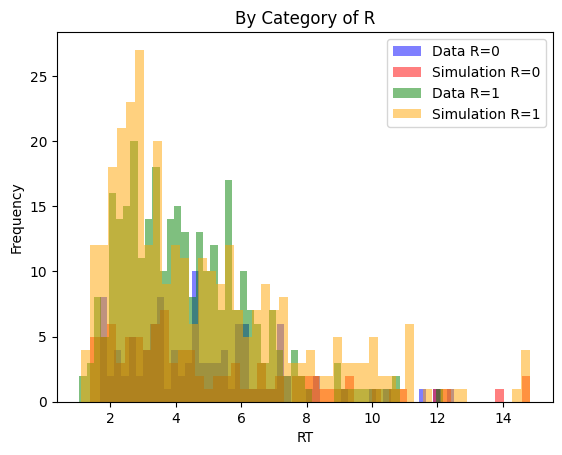

In [25]:
plot_rt_histogram(df_age1, df1)

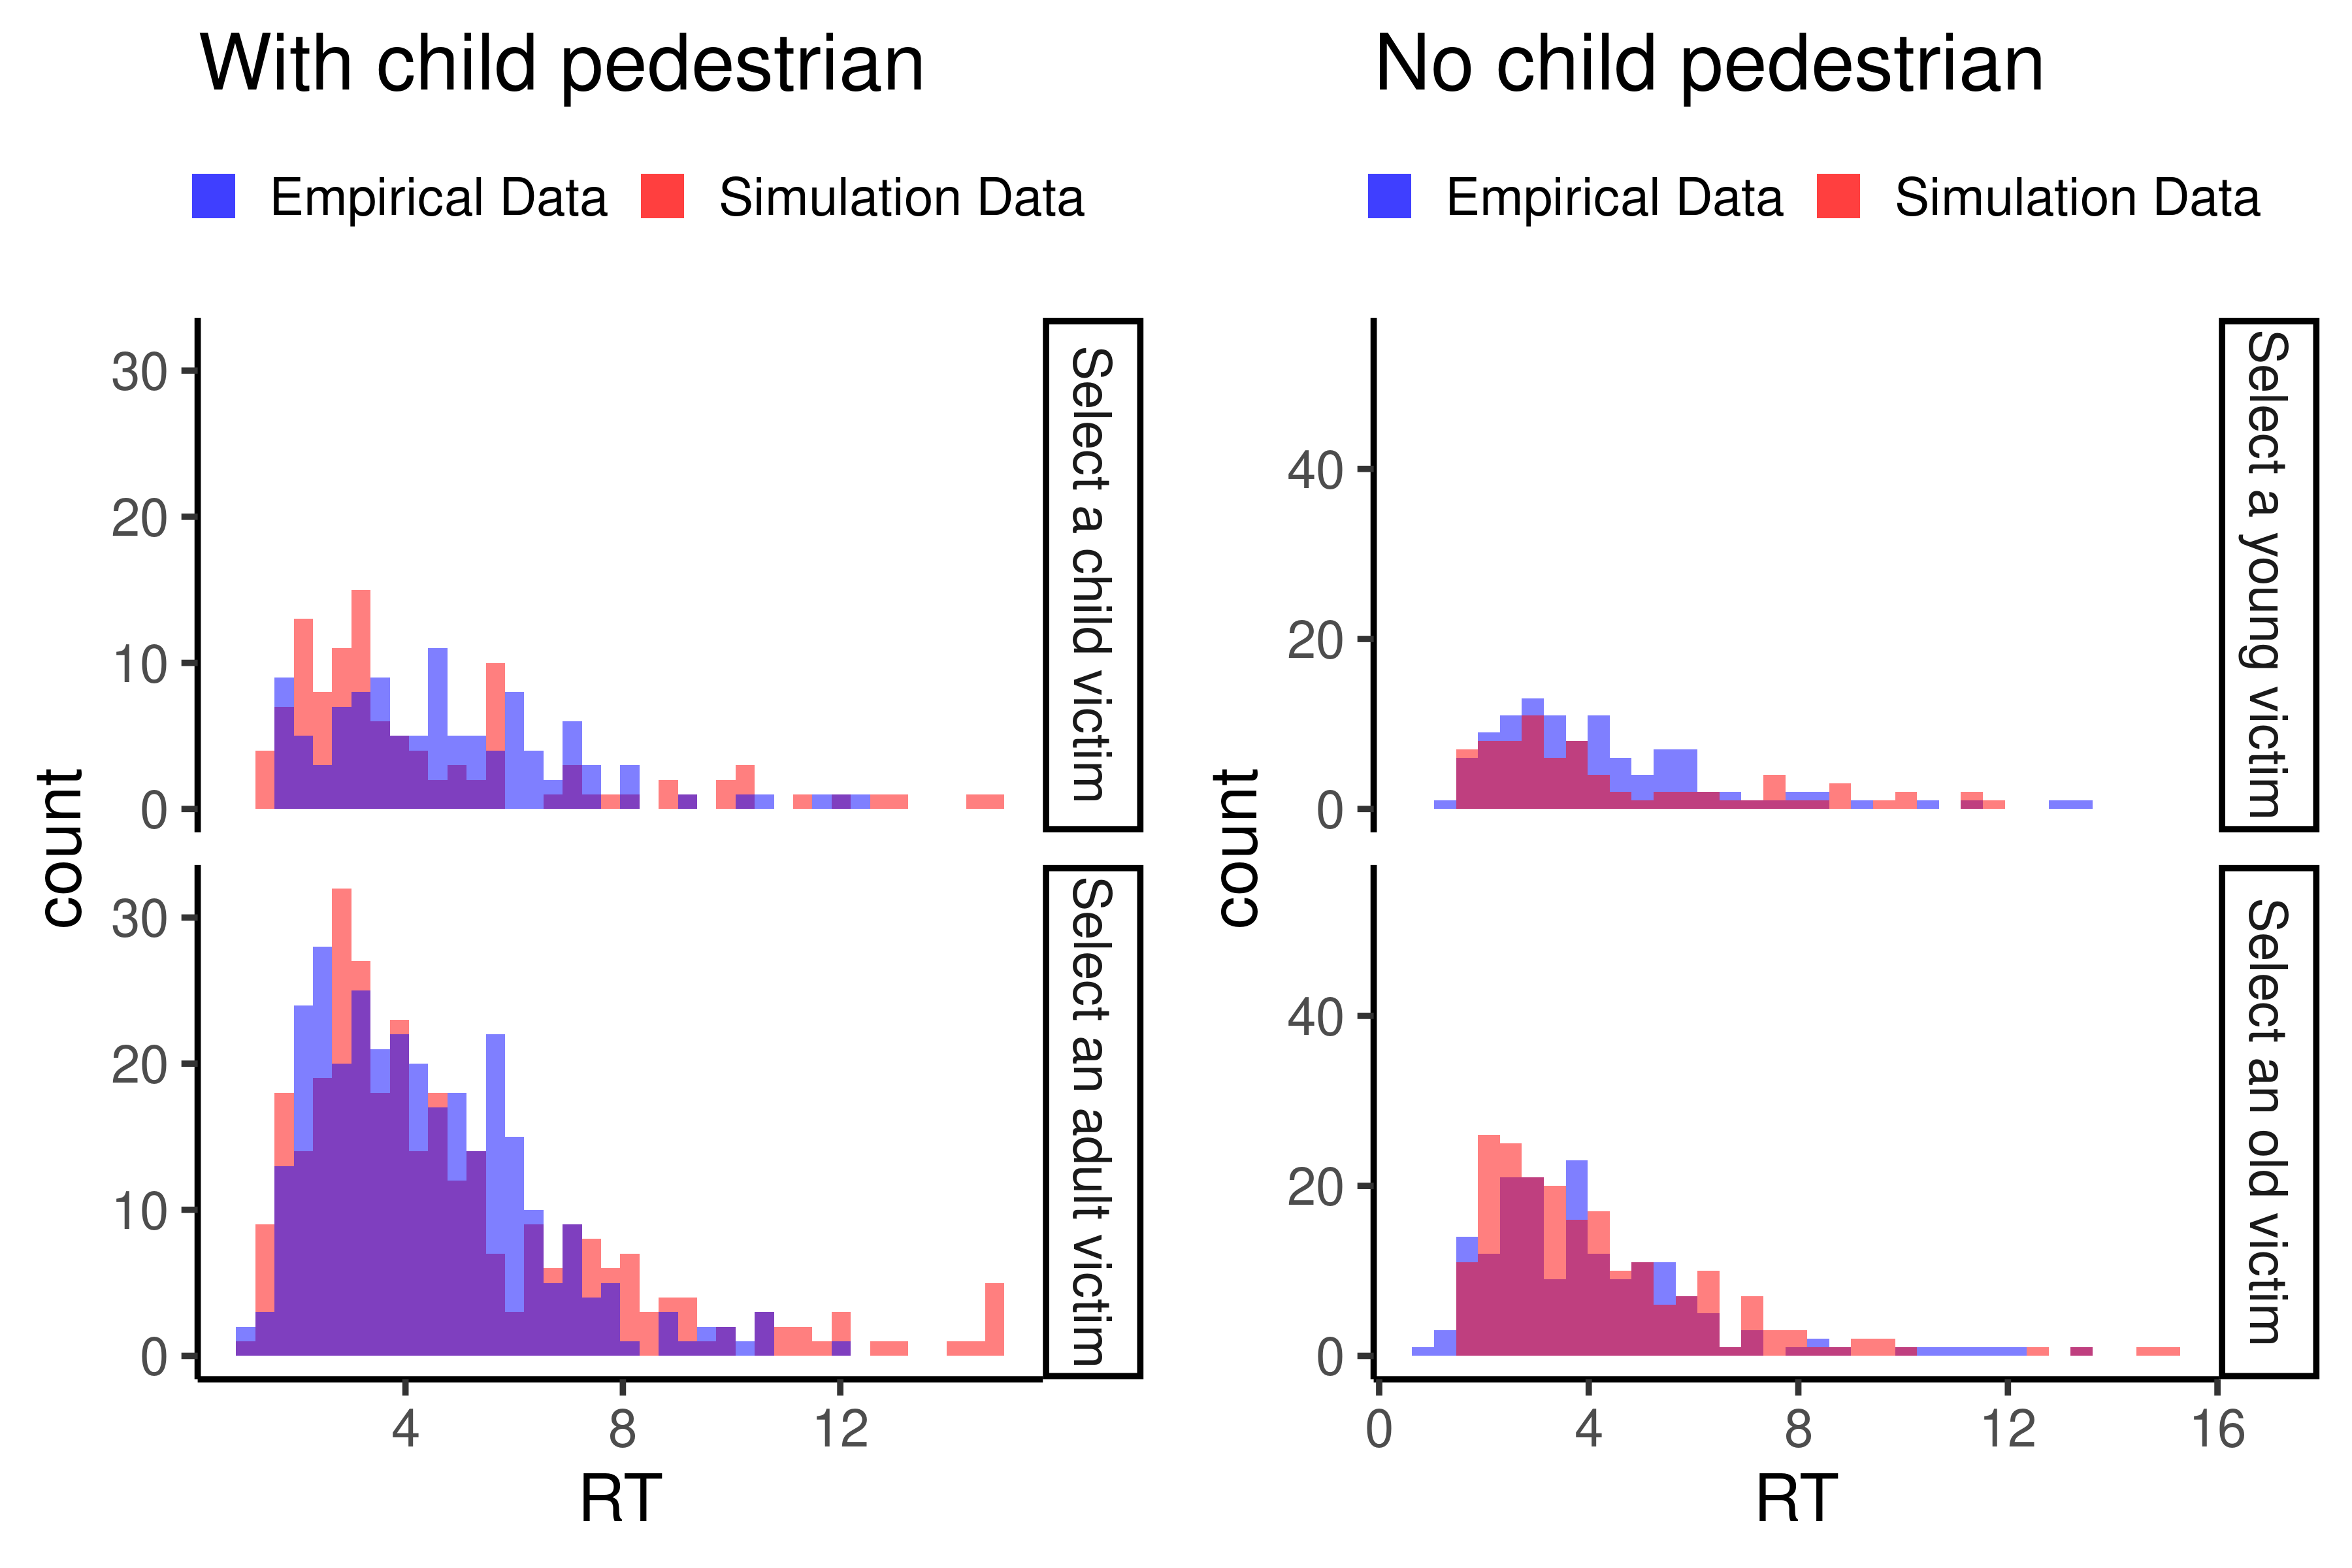

In [3]:
# It appears that there is a misalignment in the subset of data involving child pedestrians when the participant 
# decided to let the car crashed a child pedestrian. This fits well to the common sense explanation. That is, such 
# a decision result in a moral conflict. I would recommend you look up the EEG frequency data to form an 
# explanation and hypothesis, which could set a theoretical background for a next experiment. 

# A biased model may provide a better fit to this subset of data. You may compare the AIC or BIC of the two 
# models to see if this is the case. If so, we can have a good story around this line.
#
# My version of the story is that people became more hesitant to crash into a child and they comtemplated 
# longer and therefore, some other thought processes get in, resulting in the manifestation of longer response 
# times. Such a manifestation then causes the model fitted this particular subset wrose than the other 
# conditions, because of the task-unrelated thought process. 
Image(filename='./images/age_scenario.png', width=700) 